# Item-Based Collaborative Filtering with MovieLens Dataset

This notebook demonstrates how to build an item-based collaborative filtering movie recommendation system using the MovieLens dataset.

**Difference between User-Based and Item-Based Collaborative Filtering:**
- **User-Based Collaborative Filtering:** Recommends items to a user based on the preferences of similar users.
- **Item-Based Collaborative Filtering:** Recommends items similar to those the user has already liked or rated highly, based on item-item similarity.

We will cover data loading, preprocessing, building a user-item matrix, computing item-item similarity, and generating recommendations.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Explore the MovieLens Dataset

We will load the MovieLens dataset (movies.csv and ratings.csv) and perform basic exploration.

In [2]:
# Load MovieLens dataset (update the path if needed)
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

# Display first few rows of movies and ratings
display(movies.head())
display(ratings.head())

# Check for missing values
print('Missing values in movies:')
print(movies.isnull().sum())
print('\nMissing values in ratings:')
print(ratings.isnull().sum())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Missing values in movies:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


## Build User-Item Rating Matrix

We will create a user-item matrix where rows represent users and columns represent movies.

In [3]:
# Create user-item rating matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
user_item_matrix.fillna(0, inplace=True)

print('User-Item matrix shape:', user_item_matrix.shape)
display(user_item_matrix.head())

User-Item matrix shape: (610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Collaborative Filtering: Item-Based Similarity

We will compute item-item similarity and use it to recommend movies.

In [4]:
# Compute item-item similarity matrix
item_sim_matrix = cosine_similarity(user_item_matrix.T)

print('Item-Item similarity matrix shape:', item_sim_matrix.shape)

Item-Item similarity matrix shape: (9724, 9724)


## Build Item-Based Collaborative Filtering Recommendation Function

We will implement a function to recommend movies to a user based on item-item similarity.

In [5]:
# Function to recommend movies to a user based on item-item similarity
def recommend_movies_item_based(user_id, user_item_matrix, item_sim_matrix, movies_df, top_n=10):
    if user_id not in user_item_matrix.index:
        print(f"User {user_id} not found.")
        return []
    # Get the user's ratings
    user_ratings = user_item_matrix.loc[user_id]
    # Predict ratings for all movies
    pred_ratings = np.dot(item_sim_matrix, user_ratings) / np.array([np.abs(item_sim_matrix).sum(axis=1)]).T.flatten()
    # Get movies already rated by the user
    unrated_indices = user_ratings[user_ratings == 0].index
    # Recommend top_n movies with highest predicted ratings
    pred_ratings_unrated = [(movie, pred_ratings[user_item_matrix.columns.get_loc(movie)]) for movie in unrated_indices]
    pred_ratings_unrated = sorted(pred_ratings_unrated, key=lambda x: x[1], reverse=True)[:top_n]
    recommended_movie_ids = [movie for movie, _ in pred_ratings_unrated]
    return movies_df[movies_df['movieId'].isin(recommended_movie_ids)][['title', 'genres']]

## Generate Recommendations for a Sample User

Let's generate and display recommendations for a sample user using item-based collaborative filtering.

In [6]:
# Generate recommendations for a sample user
sample_user_id = 1
print(f"Item-based recommendations for User {sample_user_id}:")
recommendations = recommend_movies_item_based(sample_user_id, user_item_matrix, item_sim_matrix, movies, top_n=10)
display(recommendations)

Item-based recommendations for User 1:


,title,genres
414,"Inkwell, The (1994)",Comedy|Drama
666,Supercop 2 (Project S) (Chao ji ji hua) (1993),Action|Comedy|Crime|Thriller
870,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy
1815,Violets Are Blue... (1986),Drama|Romance
1998,It Came from Hollywood (1982),Comedy|Documentary
2116,In Too Deep (1999),Action|Thriller
2369,Hell in the Pacific (1968),Drama|War
3179,Frankie and Johnny (1966),Comedy
4224,Venom (1982),Horror|Thriller
6846,Righteous Kill (2008),Crime|Mystery|Thriller


## Evaluate Recommendation Results

Let's discuss and visualize the results. Optionally, we can compare recommendations with user ratings or preferences.

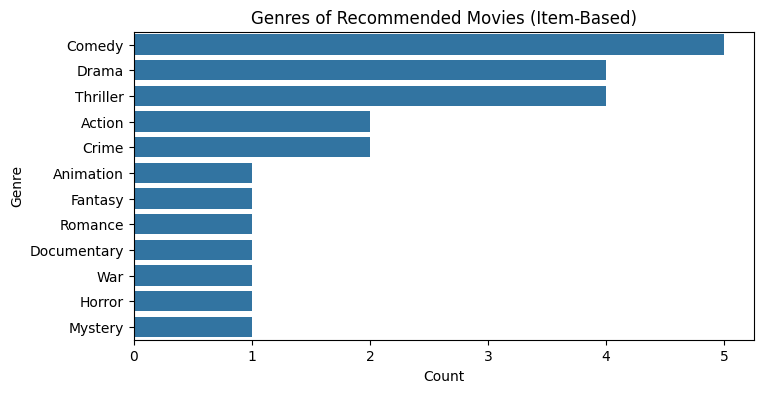

The recommended movies are selected based on similarity to items the user has already rated. Item-based collaborative filtering is often more stable when users have rated only a few items, while user-based filtering relies on finding similar users. You can further improve the system by using matrix factorization techniques or hybrid approaches.


In [7]:
# Visualize genres of recommended movies
if not recommendations.empty:
    plt.figure(figsize=(8,4))
    genres = recommendations['genres'].str.split('|').explode()
    sns.countplot(y=genres, order=genres.value_counts().index)
    plt.title('Genres of Recommended Movies (Item-Based)')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.show()
else:
    print('No recommendations to visualize.')

# Discussion:
print("The recommended movies are selected based on similarity to items the user has already rated. Item-based collaborative filtering is often more stable when users have rated only a few items, while user-based filtering relies on finding similar users. You can further improve the system by using matrix factorization techniques or hybrid approaches.")